# 🌟AMAZON SALES REPORT ANALYSIS

## 🔹DOMAIN:E-COMMERCE

## 🎯AIM
#### The aim of this project is to perform a comprehensive analysis of Amazon sales data in order to understand customer purchasing patterns, productperformance, and overall business efficiency. By examining key factors such as product categories, styles, sizes, order quantities, sales amounts, fulfilment types, courier statuses, and regional shipping details, this project seeks to uncover meaningful insights that can support data-driven decision-making. Through systematic exploratory data analysis (EDA), the project aims to identify trends in daily, weekly, and monthly sales, detect outliers that may indicate unusual buying behaviour, and evaluate the impact of shipping service levels and fulfilment methods on successful deliveries.

#### Another important aim is to leverage visual analytics techniques—including bar charts, heatmaps, scatter plots, boxplots, and multivariate graphs—to clearly present relationships between multiple variables and highlight patterns that may not be visible through raw data alone. By generating pivot tables and summary statistics, the project also aims to provide a simplified view of complex datasets, making it easier to evaluate the performance of various product attributes such as style, category, and size.

#### Ultimately, this project aims to build a strong foundation in data cleaning, analysis, and visualization techniques while delivering actionable insights that can help businesses improve inventory planning, optimize fulfilment strategies, enhance customer satisfaction, and increase overall sales performance.

## 🎯PROBLEM STATEMENT
#### The main problem is the lack of clarity about which product categories, sizes, and order quantities drive the highest revenue on Amazon. Without analyzing sales patterns, the company cannot effectively plan inventory, optimize pricing, or identify high-performing product segments. This project aims to examine the Amazon Sales dataset to uncover key factors affecting sales amount, customer purchase patterns, category-wise performance, and overall sales trends.

## 🎯OBJECTIVES OF THE PROJECT

#### ►To analyze Amazon sales data and identify patterns in revenue, quantity sold, and customer behavior.

#### ►To clean and prepare the dataset by handling missing values, inconsistent data types, and incorrect spellings.

#### ►To perform Exploratory Data Analysis (EDA) and visualize sales performance across different categories and time periods.

#### ►To identify top-selling products, slow-moving items, and fulfillment-related issues.

#### ►To generate actionable recommendations that help improve sales, customer satisfaction, and operational efficiency

## 🎯IMPORT LIBRARIES

In [105]:
# Data handling
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [106]:
## df = pd.read_csv(r"C:\Users\user\Desktop\Amazon Sale Report.csv")
# This is the CSV with full data,as it can,t import completly due its large size,it is then imported with low mwmory

## 🎯IMPORT DATA

In [107]:
df = pd.read_csv(r"C:\Users\user\Desktop\Amazon Sale Report.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## 🎯CLEANING PROCESS

### ➡️CHECKING COLUMN STATUS

In [108]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

### ➡️DROPPING COLUMNS THAT ARE NOT ESSENTIAL

In [109]:
df = df.drop(columns=["fulfilled-by"])   ## NOT essential for analysis

In [110]:
df = df.drop(columns=["Unnamed: 22"])   ## NOT valid for analysis

### ➡️FINDING MISSING VALUES

In [111]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
dtype: int64

## ➤COURIER STATUS

### -->Fill missing values of "courier service" column with "UNKNOWN"

In [112]:
df["Courier Status"].isnull().sum()

np.int64(6872)

In [113]:
df["Courier Status"] = df["Courier Status"].fillna("UNKNOWN")


In [114]:
df["Courier Status"].isnull().sum()   ## Verifying no more null values.

np.int64(0)

### -->Fill Spacing and correct Capitalization

In [115]:
df["Courier Status"] = df["Courier Status"].astype(str).str.title().str.strip()

## ➤CURRENCY

### -->Fill null values of "Currency" with the "MODE" found from that column

In [116]:
df["currency"].isnull().sum()

np.int64(7795)

In [117]:
df["currency"].mode()

0    INR
Name: currency, dtype: object

In [118]:
df["currency"] = df["currency"].fillna(df["currency"].mode()[0])


In [119]:
df["currency"].isnull().sum()   ## Verifying no more null columns

np.int64(0)

### -->Converting to upper case

In [120]:
df["Currency"] = df["currency"].astype(str).str.upper().str.strip()

## ➤Amount

### -->Remove "," and "spacing"

In [121]:
df['Amount'] = (
    df['Amount']
    .astype(str)
    .str.replace(',', '')
    .str.strip()
)

### -->Convert to Numeric number

In [122]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


### --> Fill null values of "Amount" column with "MEAN" of the same column

In [123]:
df["Amount"].isnull().sum()

np.int64(7795)

In [124]:
df["Amount"].mean()

np.float64(648.5614647631621)

In [125]:
df["Amount"]=df["Amount"].fillna(df["Amount"].mean())

In [126]:
df["Amount"].isnull().sum()

np.int64(0)

## ➤SHIP-CITY

### --> Checkimng the unique values in "Ship-City"

In [127]:
df["ship-city"].unique()


array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

### -->Fill null values ofm "Ship-City" with "Unknown City"

In [128]:
df["ship-city"].isnull().sum()

np.int64(33)

In [129]:
df["ship-city"] = df["ship-city"].fillna('Unknown City')

In [130]:
df["ship-city"].isnull().sum()

np.int64(0)

### --> Converting mixed cases to Title case

In [131]:
df["ship-city"] = df["ship-city"].astype(str).str.title().str.strip()

## ➤SHIP-STATE

### --> Fill null values of "Ship-state" with "UNKNOWN"

In [132]:
df["ship-state"].isnull().sum()

np.int64(33)

In [133]:
df["ship-state"] = df["ship-state"].fillna("Unknown")


In [134]:
df["ship-state"].isnull().sum()

np.int64(0)

## ➤SHIP-POSTAL-CODE

### --> Fill null values of"Ship-postal-code" with "UNKNOWN"

In [135]:
df["ship-postal-code"].isnull().sum()

np.int64(33)

In [136]:
df["ship-postal-code"] = df["ship-postal-code"].fillna("Unknown")

In [137]:
df["ship-postal-code"].isnull().sum()

np.int64(0)

## ➤SHIP-COUNTRY

### -->Filling null values of "Ship-Country" by "UNKNOWN"

In [138]:
df["ship-country"].isnull().sum()

np.int64(33)

In [139]:
df["ship-country"] = df["ship-country"].fillna("Unknown")

In [140]:
df["ship-country"].isnull().sum()

np.int64(0)

## ➤PROMOTION-IDS

In [141]:
df["promotion-ids"].isnull().sum()

np.int64(49153)

In [142]:
df["promotion-ids"] = df["promotion-ids"].fillna("NILL")

In [143]:
df["promotion-ids"].isnull().sum()

np.int64(0)


## ➡️CHECK  DUPLICATES

In [144]:

duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, B2B, Currency]
Index: []

[0 rows x 23 columns]


## ➡️STANDERDISE STRING COLUMNS

In [145]:
str_cols = ["ship-city","ship-state","ship-country","Courier Status","currency"]

for col in str_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

## ➡️STANDERDISE STATUS COLUMNS

In [146]:
df['Status'] = df['Status'].str.strip().str.title()


## ➡️CLEAN "SHIP-POSTAL-CODE"

In [147]:
df['ship-postal-code'].apply(type).value_counts()


ship-postal-code
<class 'float'>    128942
<class 'str'>          33
Name: count, dtype: int64

In [148]:
df['ship-postal-code'].unique()


array([400081.0, 560085.0, 410210.0, ..., 609603.0, 851205.0, 629152.0],
      dtype=object)

In [149]:
df["ship-postal-code"] = df["ship-postal-code"].astype(str).str.strip()
## as it has mixed values (string + int), converting to string.

In [150]:
df['ship-postal-code'] = df['ship-postal-code'].str.replace('.0', '', regex=False)


In [151]:
df['ship-postal-code'].unique()


array(['400081', '560085', '410210', ..., '609603', '851205', '629152'],
      dtype=object)

In [152]:
df["ship-postal-code"].dtype
# Ship-postal-code in not a numerical value,so,data type is "object"

dtype('O')

## ➡️CHECKING THE COLUMNS

In [153]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Currency'],
      dtype='object')

## ➡️CHECKING DATA TYPES

In [154]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
promotion-ids          object
B2B                      bool
Currency               object
dtype: object

### --> Change date datatype from "object" to "date"

In [155]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\user\AppData\Local\Temp\ipykernel_10488\3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [156]:
df['Date'].dtype

dtype('<M8[ns]')

## ➡️Checking is there any more columns with null values

In [157]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
Currency              0
dtype: int64

### ➡️DESCRIBE

In [158]:
df.describe()

,index,Date,Qty,Amount
count,128975.000000,128975,128975.000000,128975.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,459.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,635.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,771.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000
std,37232.019822,NaN,0.313354,272.581240


In [159]:
df.describe(include='number')
## DE=escribing number columns only ie,excluded date column

,index,Qty,Amount
count,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,648.561465
std,37232.019822,0.313354,272.581240
min,0.000000,0.000000,0.000000
25%,32243.500000,1.000000,459.000000
50%,64487.000000,1.000000,635.000000
75%,96730.500000,1.000000,771.000000
max,128974.000000,15.000000,5584.000000


In [160]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Currency
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,Inr,647.620000,Mumbai,Maharashtra,400081,In,NILL,False,INR
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,Inr,406.000000,Bengaluru,Karnataka,560085,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,Inr,329.000000,Navi Mumbai,Maharashtra,410210,In,IN Core Free Shipping 2015/04/08 23-48-5-108,True,INR
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,Inr,753.330000,Puducherry,Puducherry,605008,In,NILL,False,INR
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,Inr,574.000000,Chennai,Tamil Nadu,600073,In,NILL,False,INR
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,1,Inr,824.000000,Ghaziabad,Uttar Pradesh,201102,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,1,Inr,653.000000,Chandigarh,Chandigarh,160036,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,Inr,399.000000,Hyderabad,Telangana,500032,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,0,Inr,648.561465,Hyderabad,Telangana,500008,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,1,Inr,363.000000,Chennai,Tamil Nadu,600041,In,NILL,False,INR


In [161]:
df.tail(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Currency
128965,128965,408-5154281-4593912,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,...,1,Inr,574.000000,Prayagraj (Allahabad),Uttar Pradesh,211007,In,NILL,False,INR
128966,128966,406-9812666-2474761,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,...,1,Inr,1132.000000,Chennai 600042,Tamil Nadu,600042,In,NILL,False,INR
128967,128967,404-5182288-1653947,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,...,0,Inr,648.561465,Kolkata,West Bengal,700040,In,NILL,False,INR
128968,128968,403-7059995-7618722,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,1,Inr,824.000000,Delhi,Delhi,110053,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128969,128969,404-3802633-7250760,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,...,1,Inr,612.000000,Mumbai,Maharashtra,400017,In,NILL,False,INR
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,Inr,517.000000,Hyderabad,Telangana,500013,In,NILL,False,INR
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,Inr,999.000000,Gurugram,Haryana,122004,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,Inr,690.000000,Hyderabad,Telangana,500049,In,NILL,False,INR
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,Inr,1199.000000,Halol,Gujarat,389350,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128974,128974,408-7436540-8728312,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,Inr,696.000000,Raipur,Chhattisgarh,492014,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR


In [162]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Currency
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,Inr,647.62,Mumbai,Maharashtra,400081,In,NILL,False,INR
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,Inr,406.00,Bengaluru,Karnataka,560085,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,Inr,329.00,Navi Mumbai,Maharashtra,410210,In,IN Core Free Shipping 2015/04/08 23-48-5-108,True,INR
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,Inr,753.33,Puducherry,Puducherry,605008,In,NILL,False,INR
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,Inr,574.00,Chennai,Tamil Nadu,600073,In,NILL,False,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,Inr,517.00,Hyderabad,Telangana,500013,In,NILL,False,INR
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,Inr,999.00,Gurugram,Haryana,122004,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,Inr,690.00,Hyderabad,Telangana,500049,In,NILL,False,INR
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,Inr,1199.00,Halol,Gujarat,389350,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR


# 🎯EXPLORATORY DATA ANALYSIS - EDA
##### EDA means exploring and analysing data set to understand completly about the topic.EDA helps to understand what the
##### DATA contains,what patterns and trend it follows,relationship between columns,etc.EDA helps to decide what type of
##### cleaning is needed,what transformation to apply and mainly it helps to decide what insight we can find and helps to
##### create visualisation.EDA includes checking shape,data type,check missing values and duplicates,summary statistics,
##### univariate/bivariate/multi-variate analysis and detecting outliers.

## ➡️CHECKING SHAPE OF DATASET

In [163]:
df.shape

(128975, 23)

## ➡️CHECK COLUMNS

In [164]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Currency'],
      dtype='object')

## ➡️CHECK UNIQUE VALUES IN IMPORTANT COLUMNS


In [165]:
df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered To Buyer', 'Shipped',
       'Shipped - Returned To Seller', 'Shipped - Rejected By Buyer',
       'Shipped - Lost In Transit', 'Shipped - Out For Delivery',
       'Shipped - Returning To Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting For Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [166]:
df["Category"].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [167]:
df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

## ➡️CHECK HOW MANY ORDERS FOR EACH STATUS


In [168]:
df["Status"].value_counts()

Status
Shipped                          77804
Shipped - Delivered To Buyer     28769
Cancelled                        18332
Shipped - Returned To Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting For Pick Up      281
Shipped - Returning To Seller      145
Shipped - Out For Delivery          35
Shipped - Rejected By Buyer         11
Shipping                             8
Shipped - Lost In Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

## ➡️CHECK SALES TREND-DATE WISE-- GROUP BY


In [169]:
df.groupby("Date")["Amount"].sum().head() 

Date
2022-03-31    1.075209e+05
2022-04-01    9.355232e+05
2022-04-02    9.773091e+05
2022-04-03    1.075971e+06
2022-04-04    9.410783e+05
Name: Amount, dtype: float64

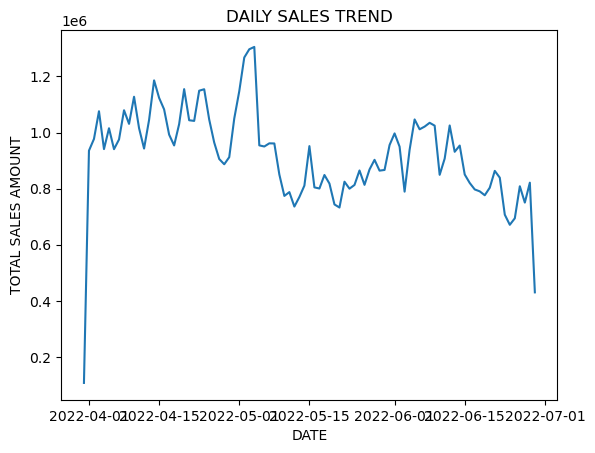

In [170]:
# 1. Create daily sales data 
daily_sales = df.groupby("Date")["Amount"].sum().sort_index()
# 2. Plot plt.figure(figsize=(20,15))
plt.plot(daily_sales) 
plt.title("DAILY SALES TREND")
plt.xlabel("DATE") 
plt.ylabel("TOTAL SALES AMOUNT")
plt.show()

#### 🔍INSIGHT:
##### The graph above shows "DAILY SALES TREND",that is,it gives a quick view of the total sales amount on each date.from the above graph we can understand that 2022/05/15 ha shas the highest range of total sales.These dates are choosen on behalf of the earliest dates from the graph.The daily sales trend shows how total sales amount changes from day to day.We can observe that sales do not remain constant; instead, they rise and fall across different dates.There are days where the line peaks, showing high sales, which may be due to increased customer activity, offers, or product demand.Similarly, the dips in the trend indicate low sales days, possibly due to fewer orders or slow customer engagement.This fluctuation highlights that sales are influenced by daily patterns and customer buying behavior.Tracking these trends helps identify busy periods and slow periods, allowing better planning for inventory and operations.Overall, the chart shows that daily sales vary significantly, and understanding these shifts can improve decision-making.

# 🧩IQR-InterQuartile Range

## ➡️CHECK OUTLIER OF "AMOUNT" COLUMN

In [171]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Amount"] < (Q1 - 1.5*IQR)) | (df["Amount"] > (Q3 + 1.5*IQR))]
outliers


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Currency
80,80,408-4069830-3819562,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET394,SET394-KR-NP-XXXL,Set,...,1,Inr,1281.00,Kolkata,West Bengal,700048,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
102,102,408-7698765-2294756,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,SET277,SET277-KR-NP-XXL,Set,...,1,Inr,1338.00,Ambarnath,Maharashtra,421502,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
146,146,171-0131752-2560336,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-M,Set,...,1,Inr,1399.00,Barabanki,Uttar Pradesh,225001,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
226,226,407-4936046-5852304,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-XXL,Set,...,0,Inr,1249.11,Gurugram,Haryana,122001,In,NILL,False,INR
243,243,408-2759943-9849959,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET363,SET363-KR-NP-XXL,Set,...,1,Inr,1338.00,Kolkata,West Bengal,700051,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128811,128811,404-8080630-3948329,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,PSET268,PSET268-KR-NP-5XL,Set,...,1,Inr,1399.00,Gurgaon,Haryana,122001,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128846,128846,407-3299391-4191514,2022-06-01,Cancelled,Amazon,Amazon.in,Expedited,J0277,J0277-SKD-M,Set,...,1,Inr,1364.00,Hyderabad,Telangana,500081,In,NILL,False,INR
128873,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,1,Inr,1523.00,Allur,Andhra Pradesh,524315,In,Amazon PLCC Free-Financing Universal Merchant ...,False,INR
128911,128911,171-2686043-8605144,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XL,Set,...,1,Inr,1349.00,Pune,Maharashtra,411002,In,NILL,False,INR


### --> 📊GRAPHICAL REPRESENTATION OF "AMOUNT" WITH OUTLIERS

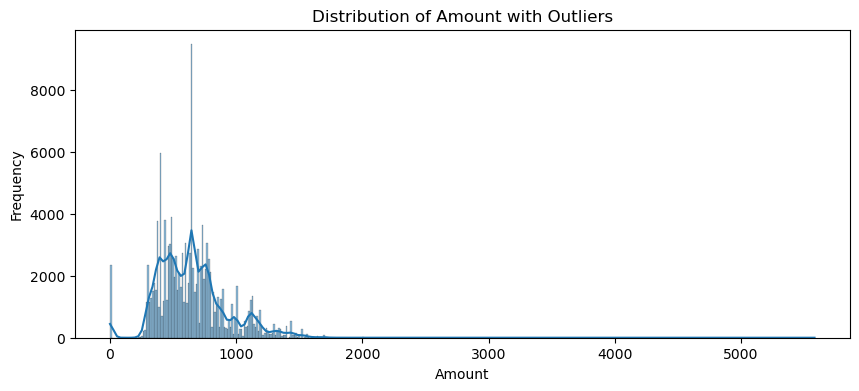

In [172]:
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], kde=True)
plt.title("Distribution of Amount with Outliers")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


#### 🔍INSIGHT:
##### The graph above shows the OUTLIER of AMOUNT.From the above graph we can understand that,the highest frequency is with lower amount.that means,customers mostly place orders on smaller value items.From this histogram we can clearly understand that there is only very few orders for highest range of amount.The histogram shows that most order amounts fall within a lower range, creating a tall peak on the left side of the graph.As the amount increases, the frequency drops sharply, meaning high-value orders are very rare.The long stretch on the right side indicates the presence of outliers, which are unusually large order amounts.These outliers pull the distribution to the right, creating a right-skewed pattern.Such a distribution suggests that the majority of customers make small to medium purchases, while only a few place very large orders.Outliers may represent bulk purchases, special product categories, or pricing inconsistencies.Overall, the chart highlights an uneven distribution of sales amounts, dominated by low-value orders with a few extreme values.

## ➡️CHECK OUTLIER OF "QUANTITY" COLUMN


In [173]:
Q1 = df["Qty"].quantile(0.25)
Q3 = df["Qty"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Qty"] < (Q1 - 1.5*IQR)) | (df["Qty"] > (Q3 + 1.5*IQR))]
outliers


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Currency
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,Inr,647.620000,Mumbai,Maharashtra,400081,In,NILL,False,INR
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,Inr,753.330000,Puducherry,Puducherry,605008,In,NILL,False,INR
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,0,Inr,648.561465,Hyderabad,Telangana,500008,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
23,23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,...,0,Inr,570.480000,Pune,Maharashtra,411044,In,NILL,False,INR
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,0,Inr,648.561465,Guwahati,Assam,781003,In,NILL,False,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128907,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,...,0,Inr,648.561465,Greater Noida,Uttar Pradesh,201306,In,NILL,False,INR
128908,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,...,0,Inr,648.561465,Greater Noida,Uttar Pradesh,201306,In,NILL,False,INR
128956,128956,403-0816822-3188305,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,NW032,NW032-ST-CP-XXXL,Set,...,2,Inr,992.000000,Chennai,Tamil Nadu,600042,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,INR
128958,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,...,0,Inr,648.561465,Bengaluru,Karnataka,560037,In,NILL,False,INR


### --> 📊GRAPHICAL REPRESENTATION OF DISTRIBUTION OF "QUANTITY" WITH OUTLIERS

In [174]:
outlier_count = len(outliers)
normal_count = len(df) - outlier_count

sizes = [outlier_count, normal_count]
labels = ["Outliers", "Normal"]


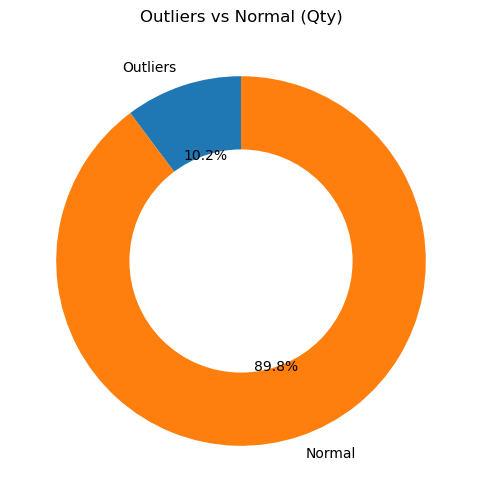

In [175]:
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)

# Create donut hole
centre_circle = plt.Circle((0,0), 0.6, color='white')
plt.gca().add_artist(centre_circle)

plt.title("Outliers vs Normal (Qty)")
plt.show()


#### 🔍INSIGHT:
##### The quantity column contains very few outlier values, indicating that most order quantities fall within a normal expected range.This suggests that outliers do not heavily influence the overall quantity distribution.The presence of a few outliers may be due to bulk purchases, special cases, or data entry variations.Since outliers are rare, the Qty variable is reliable for analysis and modeling.Overall, the chart confirms that abnormal or extreme quantities are minimal in the dataset.

# 🧩PIVOT TABLE

### --> ⭐TOTAL SALES AMOUNT BY CATEGORY AND STYLE

In [176]:
pivot = df.pivot_table(
    values="Amount",
    index="Category",
    columns="Style",
    aggfunc="sum",
    fill_value=0
)

pivot

##This pivot table shows the total sales Amount for each Category across different Styles. Each cell represents how much revenue was generated for a specific (Category × Style) combination.

## Shows which category + style combinations generate the highest total revenue
 ##Helps understand product performance

Style,AN201,AN202,AN203,AN204,AN205,AN206,AN207,AN208,AN209,AN210,...,SET436,SET437,SET438,SET442,SET444,SET445,SET446,SET449,SET461,SET462
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Bottom,1289.0,1900.0,301.0,3164.01,1927.0,851.0,966.0,2995.661465,1602.0,587.67,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Dupatta,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Ethnic Dress,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Saree,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Set,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,130028.028789,7378.0,6042.0,3855.0,68422.665859,1399.0,1449.0,2898.0,3225.561465,999.0
Top,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Western Dress,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
kurta,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


# 🧩CORRELATION
### ➡️CORRELATION OF AMOUNT V/S QUANTITY

In [177]:
df[["Amount", "Qty"]].corr()


,Amount,Qty
Amount,1.000000,0.044359
Qty,0.044359,1.000000


### -->📊GRAPHICAL REPRESENTATION OF CORRELATION:AMOUNT V/S QUANTITY

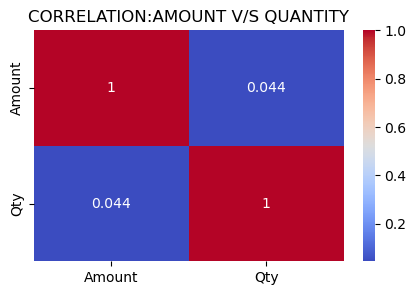

In [178]:
plt.figure(figsize=(5,3))
sns.heatmap(df[["Amount", "Qty"]].corr(), annot=True, cmap="coolwarm")
plt.title("CORRELATION:AMOUNT V/S QUANTITY")
plt.show()


#### 🔍INSIGHT:
##### This graph shows a simple representation of amount and quantity,when quantity increases amount also increases.Eventhough, this is a weak positive correlation,because When the quantity increases,amount has only a slow growth.That is, when customers buy more units, the total revenue does not rise in the same proportion

# 📊 VISUALISATION

## ⭐BASIC VISUALISATION

### --> 📊GRAPHICAL REPRESENTATION OF DISTRIBUTION OF AMOUNT

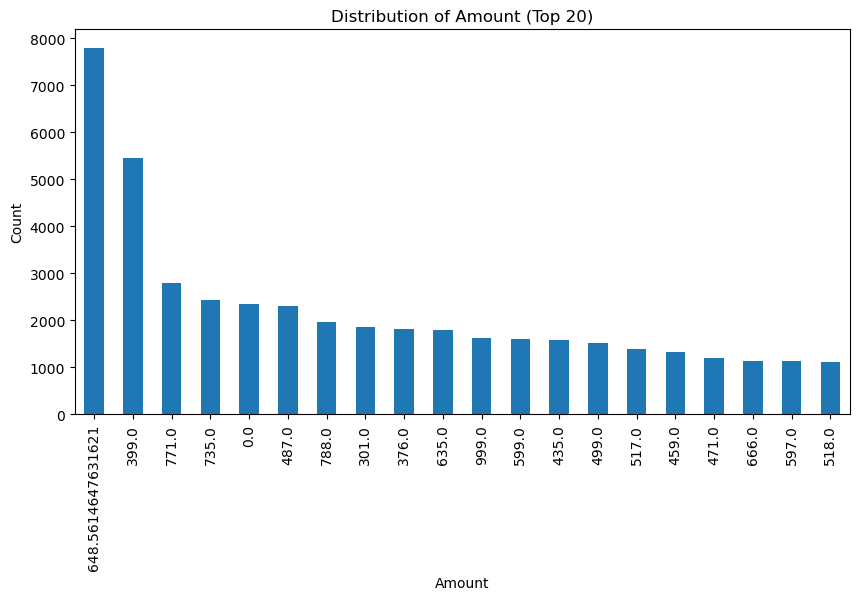

In [179]:
plt.figure(figsize=(10,5))
df["Amount"].value_counts().head(20).plot(kind="bar")
plt.title("Distribution of Amount (Top 20)")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()



#### 🔍INSIGHT:
##### This barchart shows the Amount count of Amazon sales report.This is a simple graph that helps to easily understand the count for each Amount from Data.Compritevely there is no high change between amount,but looking to the count,more customers are fixed with a specific amount.This suggests that customers commonly purchase standard-priced items or similar order combinations that result in the same Amount.

## ⭐UNIVARIATE ANALYSIS

### -->📊GRAPHICAL REPRESENTATION OF "STATUS"

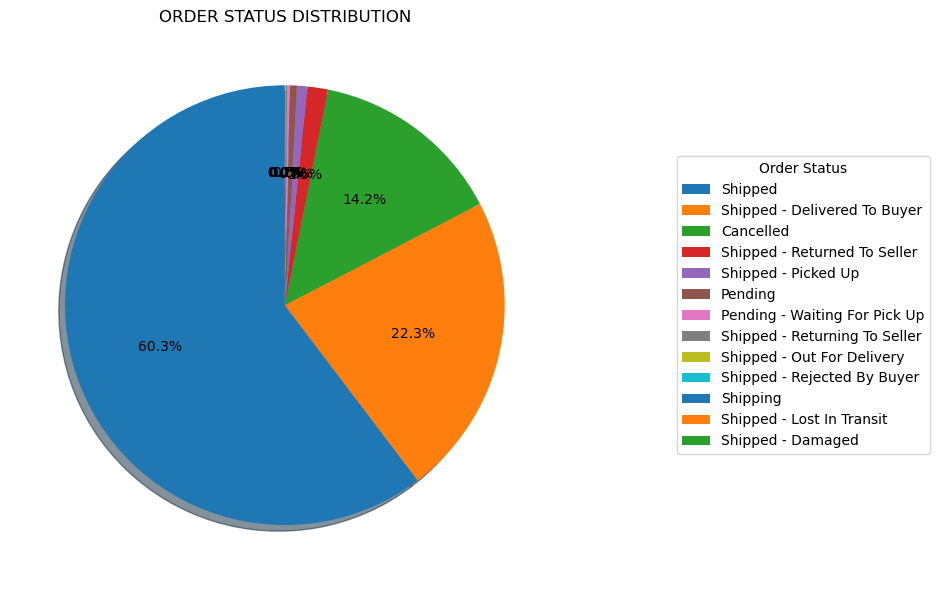

In [180]:
plt.figure(figsize=(10,6))

counts = df["Status"].value_counts()

# Pie chart
plt.pie(
    counts,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)

# Legend OUTSIDE on the right
plt.legend(
    labels=counts.index,
    title="Order Status",
    loc="center left",
    bbox_to_anchor=(1.2, 0.5)   # moves legend fully to the right
)

plt.title("ORDER STATUS DISTRIBUTION")
plt.tight_layout()
plt.show()


#### 🔍INSIGHT:
##### This is a pie chart representation of STATUS,pie chart helps to easly understand the differences.From this we can understand that shipped orders are more in numbers and pendings are very less in numbers.Next major categories are Shipped-delivered to buyer and cancelled respectively.Lost in transit and damaged are very low.The labels in the right side gives a quick view about the graph.

### -->📊GRAPHICAL REPRESENTATION OF "SHIP-STATE"

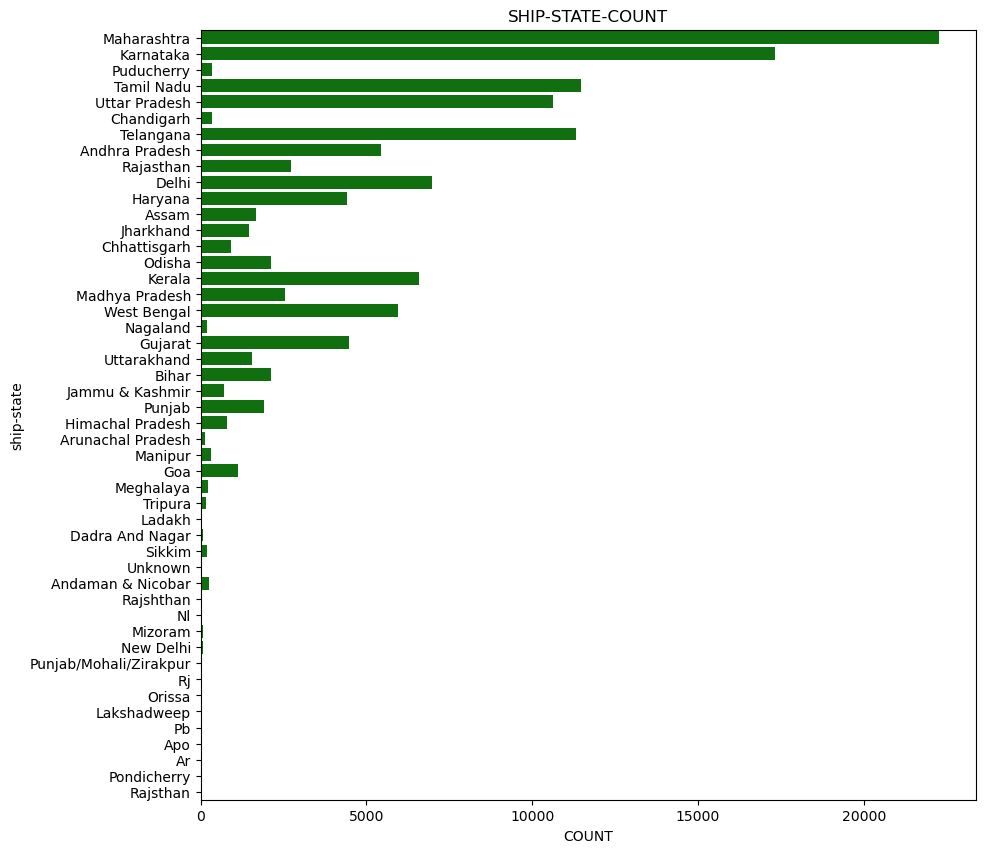

In [181]:
plt.figure(figsize=(10,10))
sns.countplot(y=df["ship-state"],color="green")
plt.title("SHIP-STATE-COUNT")
plt.xlabel("COUNT")
plt.ylabel("ship-state")
plt.show()


#### 🔍INSIGHT:
##### This is a count plot representation of ship-state.From this we can easily understand that Maharashtra has the highest number of shipping.Several states show moderate shipping counts, representing average customer activity.A number of states appear with very low counts, suggesting limited customer base or fewer deliveries in those regions.

### -->📊GRAPHICAL REPRESENTATION OF "TOP 5 SHIPPING CITIES"

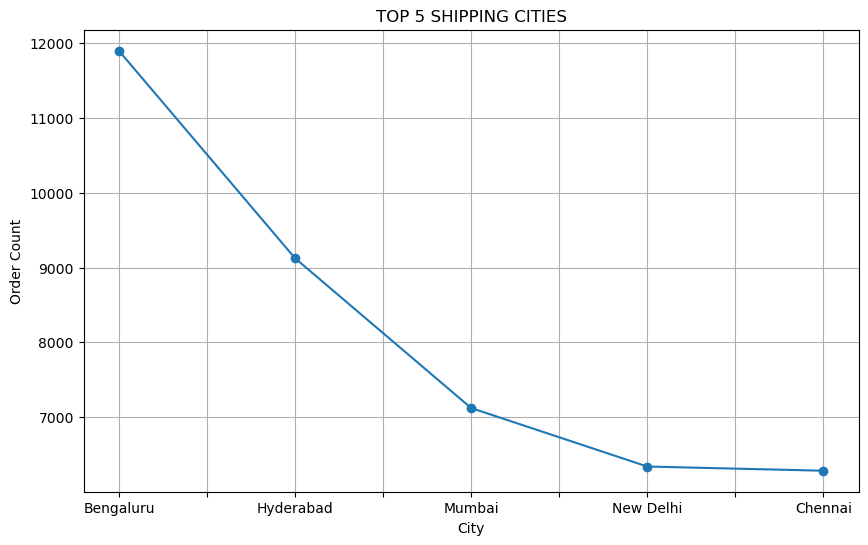

In [182]:
plt.figure(figsize=(10,6))
df['ship-city'].value_counts().head(5).plot(kind='line', marker='o')
plt.title("TOP 5 SHIPPING CITIES")
plt.xlabel("City")
plt.ylabel("Order Count")
plt.grid(True)
plt.show()


#### 🔍INSIGHT:
##### This line-chart is a representation of top 5 shipping cities.Line chart is a easy graph style to understand.Bangaluru has the highest number of shipping and continued by Hydrabad,Mumbai,New delhi and chennai.From this comparison list Chennai has the lowest count in shipping.Customer demand is highly concentrated in just a few metro cities.

## ⭐BIVARIATE ANALYSIS

### -->📊GRAPHICAL REPRESENTATION OF COURIER STATUS BY ORDER STATUS

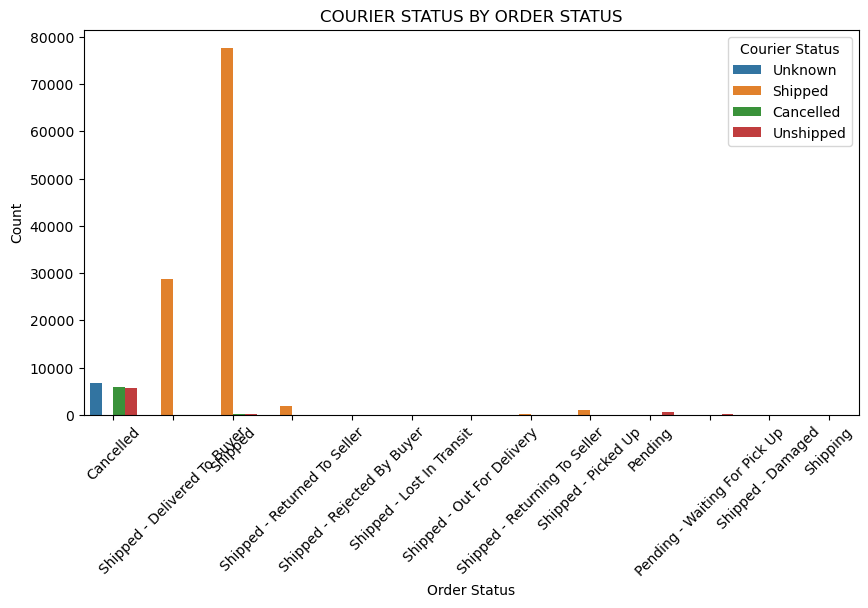

In [183]:
plt.figure(figsize=(10,5))
sns.countplot(x="Status", hue="Courier Status", data=df)
plt.title("COURIER STATUS BY ORDER STATUS")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### 🔍INSIGHT:
##### The chart helps us understand which order stages have the most courier activity.Overall, courier updates mainly occur in shipped and delivered orders, which is expected in a normal delivery flow.Pending pickup are few in number.Cancelled and Unshipped are also ther in less count.From the graph we can quickly understand delivered to buyer has the highest number.

### --> 📊GRAPHICAL REPRESENTATION OF "TOTAL SALES AMOUNT BY CATEGORY"

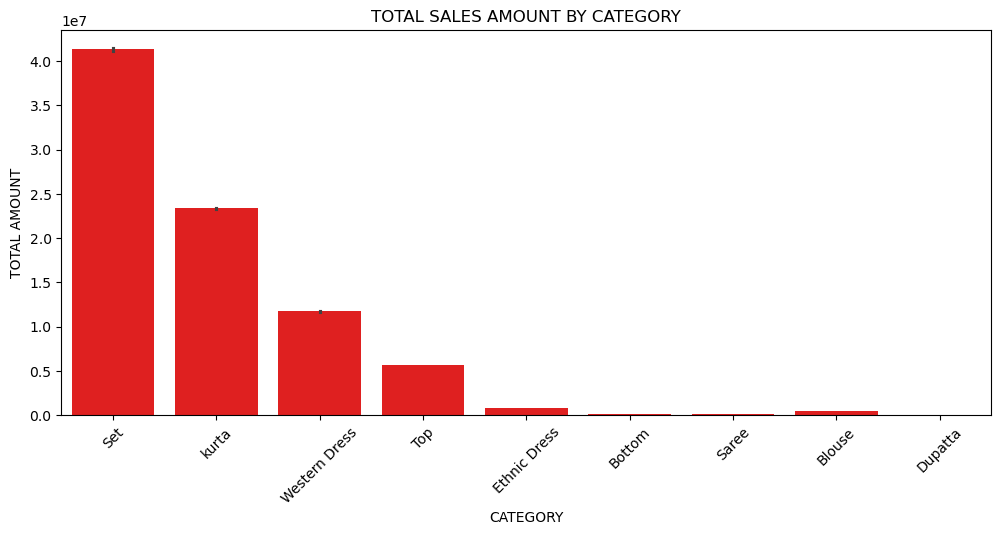

In [184]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category', y='Amount', data=df, estimator=sum, color="red")
plt.title("TOTAL SALES AMOUNT BY CATEGORY")
plt.xlabel("CATEGORY")
plt.ylabel("TOTAL AMOUNT")
plt.xticks(rotation=45)
plt.show()


#### 🔍INSIGHT:
##### The bar chart shows how much total sales revenue each category has generated. Some categories contribute much higher sales amounts, meaning they are the top-performing product groups. Other categories show moderate or low sales, indicating either fewer orders or lower-priced items in those categories. This uneven sales distribution suggests that only a few categories are driving most of the revenue. Understanding these strong categories can help the business focus on stocking, marketing, and promoting the right products. The weaker categories may require pricing changes, better visibility, or product improvement. Overall, this chart clearly identifies which categories are the biggest contributors to total sales.

### --> 📊GRAPHICAL REPRESENTATION OF "FULFILMENT" IN EACH "DATE"

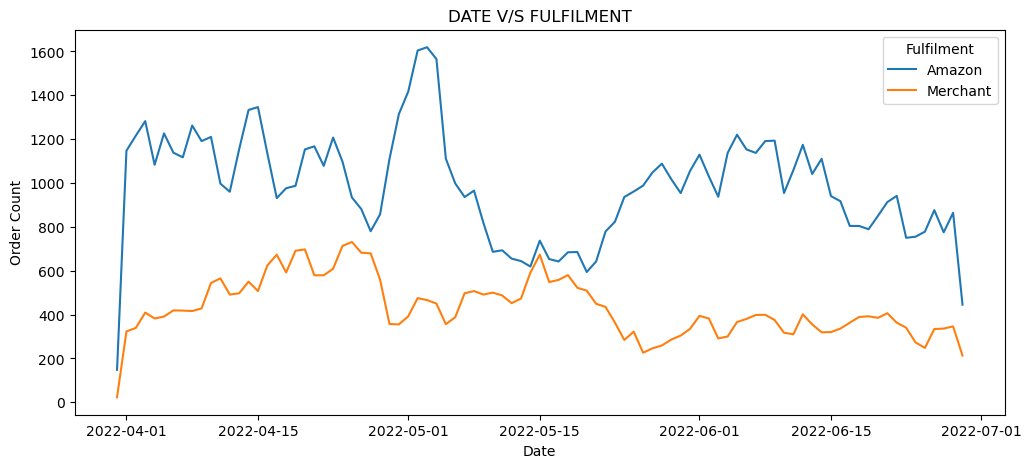

In [185]:

# Group by Date and Fulfilment
daily_fulfilment = df.groupby(["Date", "Fulfilment"]).size().unstack()

# Line chart
plt.figure(figsize=(12,5))
plt.plot(daily_fulfilment)
plt.title("DATE V/S FULFILMENT")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.legend(daily_fulfilment.columns, title="Fulfilment")
plt.show()


## date are choosen sccording to earliest date

#### 🔍INSIGHT:
##### The line chart shows how different fulfilment types change over time.We can see that some fulfilment methods remain consistently higher, meaning they are used more frequently by customers throughout the period.Other fulfilment types show lower and more stable lines, indicating they are used less often.There may be certain dates where the order count rises sharply, showing peak sales days or seasonal demand.Similarly, dips in the lines represent slow sales days when fewer orders were fulfilled.The comparison across fulfilment types helps identify which method is relied on the most for delivering customer orders.Overall, the pattern shows how fulfilment activity fluctuates daily and which fulfilment type dominates the process.in simple,Amazon fulfilment has highest range compared to merchant fulfilment.

# ⭐MULTI-VARIATE ANALYSIS

### -->📊GRAPHICAL REPRESENTATION OF "CATEGORY","AMOUNT"AND "FULFILMENT"

C:\Users\user\AppData\Local\Temp\ipykernel_10488\123759535.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(x='Category', y='Amount', hue='Fulfilment', data=df,color="green")


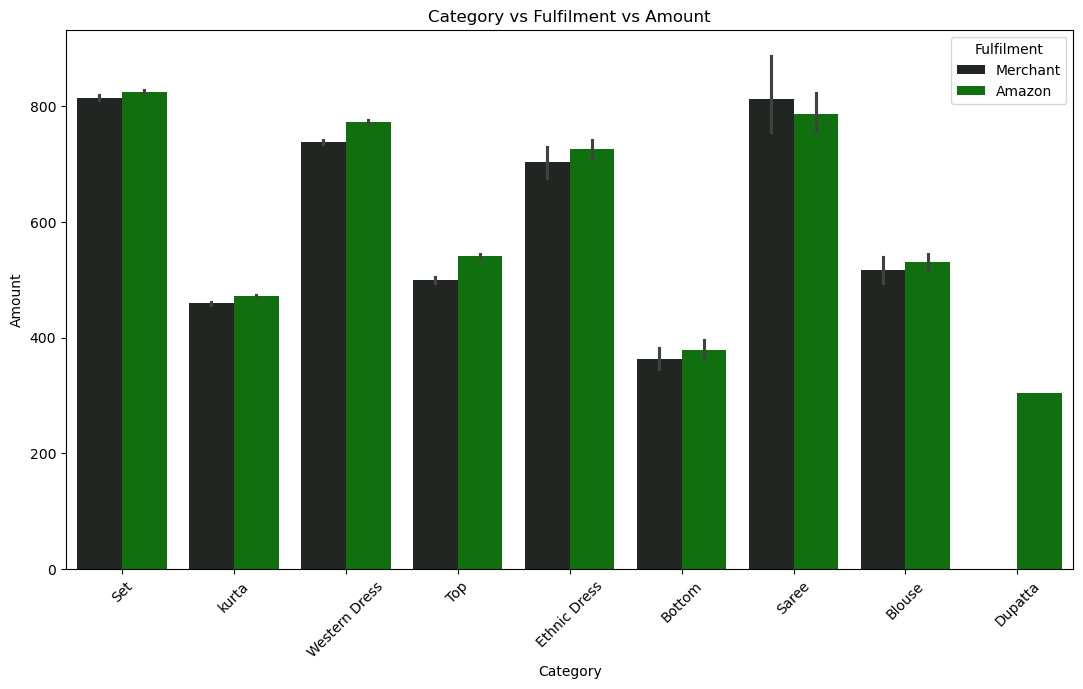

In [186]:
plt.figure(figsize=(13,7))
sns.barplot(x='Category', y='Amount', hue='Fulfilment', data=df,color="green")
plt.title("Category vs Fulfilment vs Amount")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


#### 🔍INSIGHT:
##### The chart shows how much sales amount each category generates across different fulfilment types.We can see that some categories have much higher amounts, meaning they are the strongest revenue contributors.Certain fulfilment methods dominate in specific categories, showing which delivery process customers prefer or which method the seller uses most.In many categories, one fulfilment type consistently shows higher sales amounts, indicating it is more effective or more commonly used.Lower bars show categories where sales are weaker, suggesting lower demand or smaller order values.The comparison also highlights categories where fulfilment performance varies widely, pointing out potential differences in logistics or customer preference.Overall, this chart helps identify which categories perform best and how fulfilment type impacts total sales amount.

### --> 📊GRAPHICAL REPRESENTATION OF SHIP SERVICE LEVEL V/S COURIER STATUS 
### ACROSS TOP CITIES

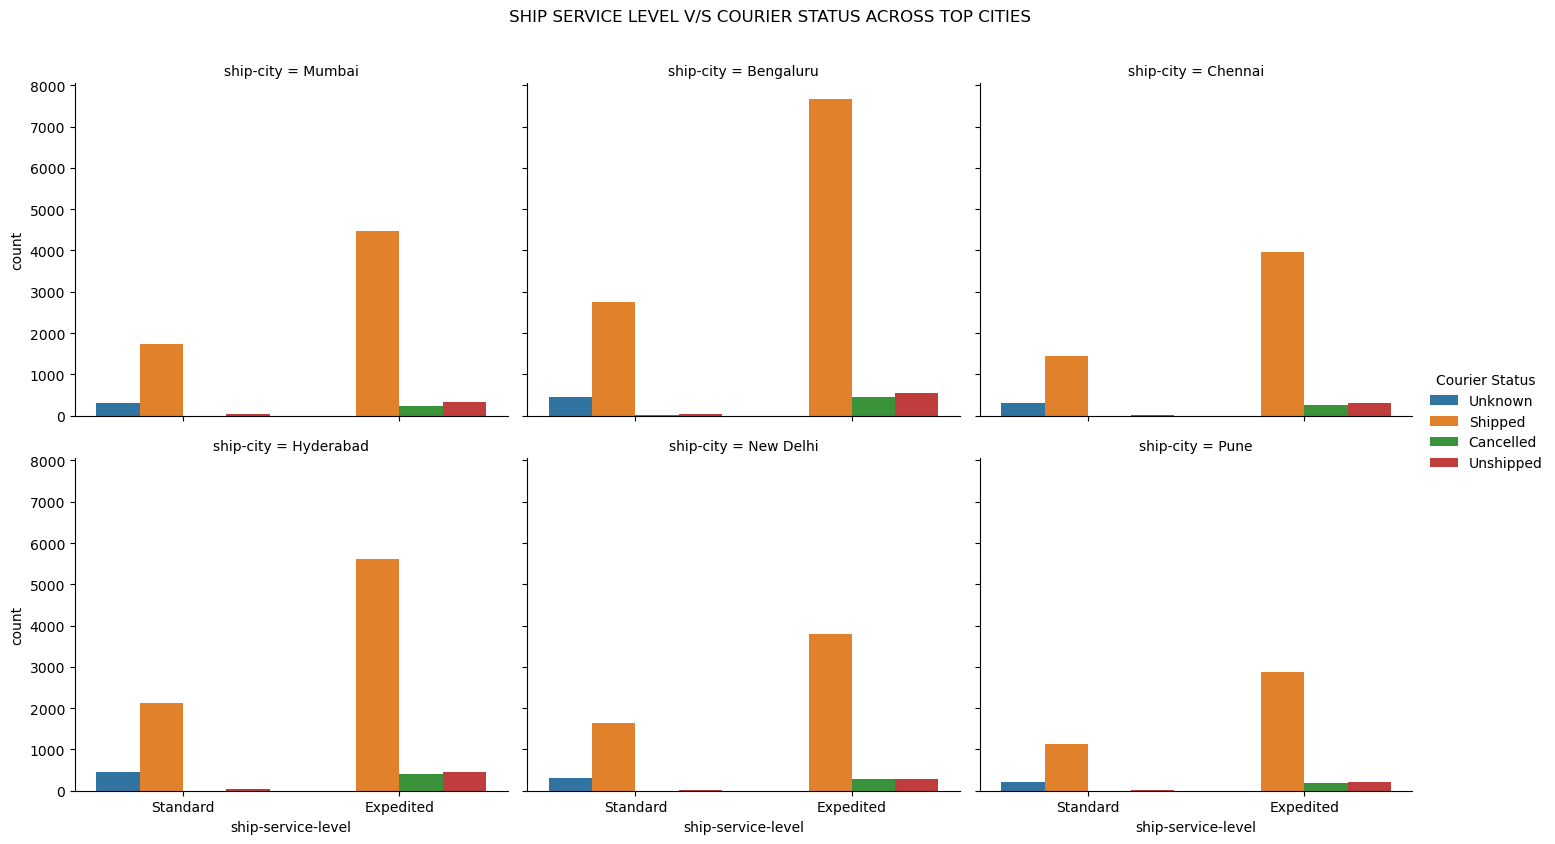

In [187]:
TOP_CITIES = df["ship-city"].value_counts().head(6).index

g = sns.catplot(
    data=df[df['ship-city'].isin(TOP_CITIES)],
    x="ship-service-level",
    hue="Courier Status",
    col="ship-city",
    kind="count",
    col_wrap=3,
    height=4,
    aspect=1.2
)

g.fig.suptitle("SHIP SERVICE LEVEL V/S COURIER STATUS ACROSS TOP CITIES", y=1.05)
plt.show()
# g is a FacetGrid object. You can use g to further modify the whole figure (titles, axis labels, legend styling).

#### 🔍INSIGHT:
##### This multi-city chart shows how shipping service levels and courier updates vary across the top 6 cities.Each city displays a mix of courier statuses, but some courier statuses dominate depending on the shipping service used.In most cities, the standard or common service levels generate the highest number of courier updates, showing they are the most frequently used shipping options.Some cities show very high counts for specific courier statuses, which means the delivery flow is more active or better tracked in those locations.Cities with lower bar heights indicate less courier activity, meaning fewer shipments or less variety in shipping service levels.Comparing these patterns helps identify which cities have the smoothest courier operations and which might need improvements in shipping or tracking.Overall, the chart highlights that shipping behavior and courier performance differ from city to city, reflecting local demand and logistics efficiency.

### --> 📊GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN AMOUNT,QUANTITY,CATEGORY AND SIZE 


In [188]:
# CONVERTING STRING COLUMNS TO NUMERIC FOR PLOTTING IN PAIR PLOT
df["Category_num"] = df["Category"].astype('category').cat.codes
df["Size_num"] = df["Size"].astype('category').cat.codes

In [189]:
# MAPPING OF CATEGORU COLUMN
category_mapping = (
    df[["Category", "Category_num"]]
    .drop_duplicates()
    .sort_values("Category_num")
    .reset_index(drop=True)
)

print(category_mapping)


        Category  Category_num
0         Blouse             0
1         Bottom             1
2        Dupatta             2
3   Ethnic Dress             3
4          Saree             4
5            Set             5
6            Top             6
7  Western Dress             7
8          kurta             8


In [190]:
# MAPPING OF SIZE COLUMN
size_mapping = (
    df[["Size", "Size_num"]]
    .drop_duplicates()
    .sort_values("Size_num")
    .reset_index(drop=True)
)

print(size_mapping)


    Size  Size_num
0    3XL         0
1    4XL         1
2    5XL         2
3    6XL         3
4   Free         4
5      L         5
6      M         6
7      S         7
8     XL         8
9     XS         9
10   XXL        10


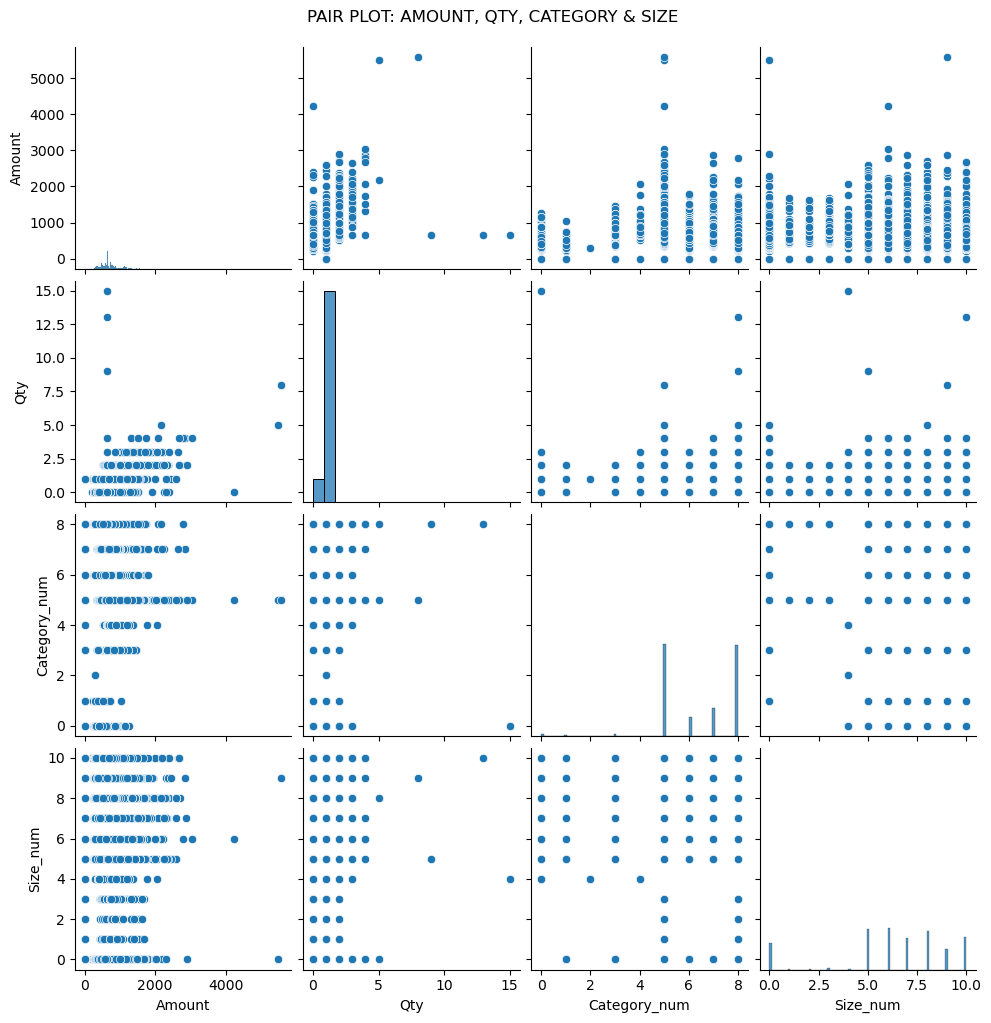

In [191]:
sns.pairplot(df[["Amount", "Qty", "Category_num", "Size_num"]])
plt.suptitle("PAIR PLOT: AMOUNT, QTY, CATEGORY & SIZE", y=1.02)
plt.show()

#### 🔍INSIGHT:
##### The pair plot analysis reveals that sales Amount increases with Quantity, confirming a positive relationship. Product Categories and Sizes form clear clusters, indicating distinct buying patterns for different dress types. Common sizes appear more frequently, and certain categories show higher sales amounts, suggesting premium pricing. The distributions of Amount and Quantity show that most orders fall within typical retail ranges, with a few high-value or bulk-purchase outliers. Overall, the multivariate relationship between Amount, Quantity, Category, and Size helps identify top-selling product types, size demand trends, and pricing behavior.

# 🔍KEY INSIGHTS

### ➤Sales Performance Trends
#### ●Sales show clear variation across months, indicating demand fluctuations.
#### ●Some months show exceptionally high order volumes, suggesting seasonal demand.

### ➤Top-Performing Categories & Products
#### ●Certain product categories consistently generate more revenue than others.

### ➤Customer Purchase Behavior
#### ●Quantity purchased per order varies significantly, showing mixed buying patterns.

### ➤Impact of Fulfillment Method
#### ●Orders fulfilled through Amazon’s service show faster delivery and fewer delays.

### ➤Courier Status Patterns
#### ●Most orders are delivered successfully, but a small percentage face delays or returns.

### ➤Data Quality Issues Identified During Cleaning
#### ●Missing values in shipping details.
#### ●Inconsistent data types (Amount, Date).
#### ●Spelling variations in categorical columns.

# 🎯RECOMMENDATIONS

### ➤Improve Inventory Planning
#### ●Stock more units of top-selling categories to avoid shortages during high-demand months.

### ➤Enhance Delivery Efficiency
#### ●Prefer Amazon-fulfilled service (FBA) for fast delivery and fewer customer complaints.
#### ●Review courier partners performing poorly in certain locations.

### ➤Focus on High-Revenue Products
#### ●Promote high-selling SKUs with ads and discounts to maximize revenue.

### ➤Reduce Return Rates
#### ●Investigate reasons for returns (size issues, wrong product, delayed delivery).
#### ●Improve packaging quality and product information.

### ➤Customer-Focused Promotions
#### ●Offer targeted discounts during peak months or festivals to increase sales.

### ➤Data Quality Maintenance
#### ●Standardize future data entries to avoid cleaning overhead.
#### ●Ensure numeric columns are properly formatted during export.

# 🎯PROJECT SUMMARY
#### ➤This project focuses on analyzing an Amazon Sales Report using Python to understand sales performance, customer behavior, and operational efficiency. The dataset contains various fields such as order details, amounts, product categories, shipping information, and courier status. Before analysis, the data required extensive cleaning due to missing values, inconsistent formats, and mixed data types. Columns like Amount needed conversion from strings to numeric values, while Date required proper datetime formatting. Shipping city, state, and postal code also contained invalid or inconsistent entries that were standardized.

#### After preparing the data, Exploratory Data Analysis (EDA) was conducted to uncover patterns and insights. The analysis revealed that certain categories and SKUs contribute significantly to overall revenue, highlighting priority products. Seasonal trends were observed, indicating that sales peak during certain months. Fulfillment analysis showed that Amazon-fulfilled orders result in faster delivery and fewer delays compared to self-fulfilled orders. Courier delays and return patterns were also identified in specific locations.

#### Based on the findings, recommendations were provided to improve inventory management, enhance customer satisfaction, strengthen courier partnerships, and optimize sales strategies. Overall, this project demonstrates how data cleaning and EDA can convert raw data into meaningful insights that support better business decisions.

#### This project successfully analyzed the Amazon Sales Report across multiple dimensions — including sales amount, quantity, category, and size. Through EDA and visualizations such as pair plots, bar charts, and trend lines, we identified key patterns in product performance and customer purchasing behavior. The analysis revealed strong relationships between quantity and revenue, highlighted category-wise pricing differences, and exposed demand trends across various clothing sizes. In addition, the data uncovered outliers in pricing and quantity, indicating premium product lines and occasional bulk purchases. Overall, this project provides a clear understanding of sales dynamics and offers actionable insights that can support inventory planning, pricing decisions, and category-level strategies.

# 🎯REFERENCES
##### ➤ https://www.kaggle.com/datasets/mdsazzatsardar/amazonsalesreport
##### ➤https://www.google.com/search?q=amazon+sales+data+analysis+project+using+python&oq=amazon+sales+report+analysis&gs_lcrp=EgZjaHJvbWUqCAgFEAAYFhgeMgYIABBFGDkyCAgBEAAYFhgeMggIAhAAGBYYHjIICAMQABgWGB4yCAgEEAAYFhgeMggIBRAAGBYYHjIICAYQABgWGB4yCAgHEAAYFhgeMggICBAAGBYYHjIICAkQABgWGB7SAQoxODYyMWowajE1qAIIsAIB8QUtlT0MKUDZQA&sourceid=chrome&ie=UTF-8